In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(12345)
plt.rc('figure', figsize=(10, 10))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, threshold=15,suppress=True)

# 1. 基本概念
    方向导数：是一个数；反映的是f(x,y)在P0点沿方向v的变化率。

    偏导数：是多个数（每元有一个）；是指多元函数沿坐标轴方向的方向导数，因此二元函数就有两个偏导数。

    偏导函数：是一个函数；是一个关于点的偏导数的函数。

    梯度：是一个向量；每个元素为函数对一元变量的偏导数；它既有大小（其大小为最大方向导数），也有方向。


## 1.1导数

求导数公式:
$$ f'(x_0)= \lim_{\Delta \to 0}\frac {\Delta y} {\Delta x} = \lim_{\Delta \to 0} \frac {f(x_0 + \Delta x) - f(x_0)} {\Delta x}$$

反映的是函数y=f(x)在某一点处<font color='red'>沿x轴正方向的变化率</font>。再强调一遍，是函数f(x)在x轴上某一点处沿着x轴正方向的变化率/变化趋势。

示例函数: $$y = f(x) = x^2$$
其导数: $$f'(x) = 2x$$
求某一点的切线: $$\frac {y - x_0^2} {x - x_0} = 2x_0$$

In [2]:
x = np.linspace(-10, 10, 100)
y1 = x ** 2
y2 = 10*x - 25  # y1 过x0 = 5 的切线

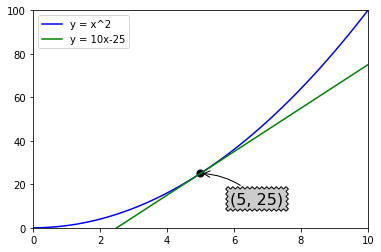

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim([0, 10])
ax.set_ylim([0, 100])
ax.plot(x, y1, 'b', label='y = x^2')
ax.plot(x, y2, 'g', label='y = 10x-25')
ax.scatter([5,], [25,], s=50, color='k')
ax.annotate('(5, 25)', xy=(5, 25), xycoords='data', xytext=(+30, -30), 
            textcoords='offset points', fontsize=16,
            bbox=dict(boxstyle='sawtooth', fc='0.8'),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2'))
plt.legend(loc='best')

## 1.2 偏导数和导数

偏导数: $$ \frac {\partial} {\partial x_j} f(x_0, x_1, \ldots, x_n) = \lim_{\Delta \to 0}
\frac{\Delta y}{\Delta x} = \lim_{\Delta \to 0} 
\frac {f(x_0,\ldots,x_j+\Delta x,\ldots, x_n) - f(x_0,\ldots,x_j,\ldots, x_n)}{\Delta x}$$

 导数与偏导数本质是一致的，都是当自变量的变化量趋于0时，函数值的变化量与自变量变化量比值的极限。直观地说，偏导数也就是函数在某一点上<font color='red'>沿坐标轴正方向的的变化率</font>  
 
 区别在于：
- 导数，指的是一元函数中，函数y=f(x)在某一点处沿x轴正方向的变化率；
- 偏导数，指的是多元函数中，函数y=f(x1,x2,…,xn)在某一点处沿某一坐标轴（x1,x2,…,xn）正方向的变化率。

## 1.3 导数与方向导数

方向导数的定义:
$$\frac {\partial}{\partial l}f(x_0, x_1,\ldots,x_n) = \lim_{\rho \to 0}\frac {\Delta y} {\Delta x}
 = \lim_{\rho \to 0}\frac {f(x_0+\Delta x_0,\ldots,x_j+\Delta x_j,\ldots,x_n+\Delta x_n) - 
 f(x_0,\ldots,x_j,\ldots,x_n)}{\rho}$$
 $$\rho = \sqrt {(\Delta x_0)^2+\ldots+(\Delta x_j)^2+\ldots+(\Delta x_n)^2}$$

在前面导数和偏导数的定义中，均是沿坐标轴正方向讨论函数的变化率。那么当我们讨论函数沿任意方向的变化率时，也就引出了方向导数的定义，即：<font color='red'>某一点在某一趋近方向上的导数值</font>.  

通俗的解释是：
我们不仅要知道函数在坐标轴正方向上的变化率（即偏导数），而且还要设法求得函数在其他特定方向上的变化率。而方向导数就是函数在其他特定方向上的变化率。

## 1.4 导数与梯度

梯度定义:
    $$\mathcal granf(x_0,x_1,\cdots,x_n) = \big(\frac {\partial f}{\partial x_0},\cdots,
    \frac {\partial f}{\partial x_j},\cdots, \frac {\partial f}{\partial x_n} \big)$$
设 $z = f(x, y)$ 在$P_0(x_0, y_0) $处存在偏导数 $f_x'(x_0,y_0)$和$f_y'(x_0,y_0)$,则称向量$\{ f_x'(x_0,y_0), f_y'(x_0,y_0) \}$ 为$f(x, y)$在$P_0(x_0, y_0) $的梯度, 记作:
$$\nabla f|_{p_0}或granf|_{p_0}$$

梯度的提出只为回答一个问题：  

　函数在变量空间的某一点处，沿着哪一个方向有最大的变化率？  
 
　梯度定义如下：  
 
　<font color='red'>函数在某一点的梯度是这样一个向量，它的方向与取得最大方向导数的方向一致，而它的模为方向导数的最大值。</font>  
 
　这里注意三点：  
 1. 梯度是一个向量， 大小:$$|\nabla f| = \sqrt {\left [ f_x'(x, y) \right ]^2 + \left[ f_y'(x, y) \right]^2}$$ 
 2. 梯度的方向是最大方向导数的方向 ,设$v=\{v_1,v_2\}(|V|=1)$是任一给定方向,则对$\nabla f$与v的夹角$\theta$有
 $$\frac {\partial f}{\partial v} |_{p_0}= f_x'(x_0, y_0)v_1 + f_y'(x_0, y_0)v_2
 = \{f_x'(x_0, y_0), f_y'(x_0, y_0)\}\cdot\{v_1, v_2\} = \nabla f|_{p_0}\cdot v = |\nabla f|_{p_0}\cos\theta
 $$
 3. 梯度的值是最大方向导数的值 : $|granf(x, y)| = \sqrt {(\frac {\partial f} {\partial x})^2 + (\frac {\partial f} {\partial y})^2}$。

设 $z = f(x, y) =xy^2$ , 求$f(x,y)$在(1, -1)处沿任意方向$v={v_1, v_2}(|V|=1)$的方向导数,  
并指出方向导数的最大值和取得最大值方向的单位向量;  
$f_x'(x, y)=y^2, f_y'(x, y)=2xy$  
$\frac {\partial f}{\partial v}|_{(1, -1)} = \{f_x'(1, -1)v_1, f_y'(1, -1)v_2 \}= v_1 - 2v_2 $  
那么$\nabla f|_{(1, -1)}=\{1, -2\}$, $|\nabla f|_{(1, -1)} = \sqrt {5}$  
取得最大方向的单位向量:
$v = \frac {\nabla f|_{(1, -1)}}{|\nabla f|_{(1, -1)}} = \{\frac {1}{\sqrt {5}}, - \frac {2}{\sqrt {5}}\}$

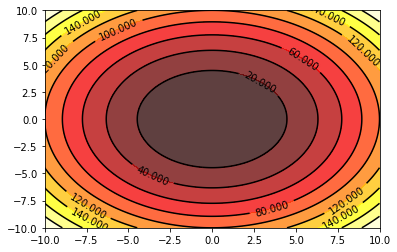

In [4]:
def plot_contours():
    # 等高线
    def f1(x, y):
        return x**2 + y**2
    n = 256
    x = np.linspace(-10, 10, n)
    y = np.linspace(-10, 10, n)
    X, Y = np.meshgrid(x, y)
    # 颜色填充
    plt.contourf(X, Y, f1(X, Y), 10, alpha=.75, cmap=plt.cm.hot)
    # 绘制等高线
    C = plt.contour(X, Y, f1(X, Y), 10, colors='black')
    plt.clabel(C, inline=True, fontsize=10)
plot_contours()

函数$f(x, y)= x^2 + y^2$的等高线如上图, 其梯度向量$\nabla f = \begin{pmatrix}
\frac {\partial f}{\partial x} \\ \frac {\partial f}{\partial y} \end{pmatrix} =\begin{pmatrix} 2x \\2y \end{pmatrix}$, 是等高线的**法线**, 更准确的表述是:  
**梯度与等高线的切线垂直**

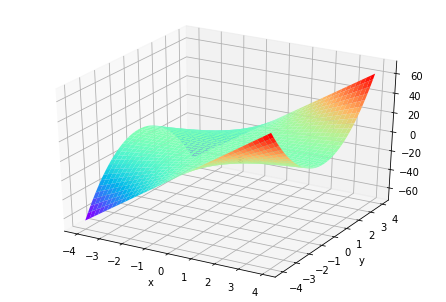

In [5]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(-4, 4, 0.05)
Y = np.arange(-4, 4, 0.05)
X, Y = np.meshgrid(X, Y)
Z = X * Y**2
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.scatter3D([1,], [-1],[0,], s=30, c='k')
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, cmap=plt.get_cmap('rainbow'))
# ax.view_init(elev=30, azim=90)


## 1.5 梯度上升法(Gradient Ascent)

要找到某函数的最大值，最好的方法是沿着该函数的梯度方向探寻
梯度上升算法的迭代公式如下:
$$w := w + \alpha \nabla_w f(w)$$
$\alpha$为步长,是每次移动量的大小。该公式将一直被迭代执行，直至达到某个停止条件为止，比如迭代次数达到某个指定值或者算法达到某个可以允许的误差范围。

### 1.5.1 梯度上升 or 梯度下降

其实这个两个方法在此情况下本质上是相同的。关键在于代价函数（cost function）或者叫目标函数（objective function）。如果目标函数是损失函数，那就是最小化损失函数来求函数的最小值，就用梯度下降。 如果目标函数是似然函数（Likelihood function），就是要最大化似然函数来求函数的最大值，那就用梯度上升。在逻辑回归中， 损失函数和似然函数无非就是互为正负关系。

# 2. Logistic 对数几率回归 原理
Logistic Regression和Linear Regression的原理是相似的，按照我自己的理解，可以简单的描述为这样的过程：

（1）找一个合适的预测函数（Andrew Ng的公开课中称为hypothesis），一般表示为h函数，该函数就是我们需要找的分类函数，它用来预测输入数据的判断结果。这个过程时非常关键的，需要对数据有一定的了解或分析，知道或者猜测预测函数的“大概”形式，比如是线性函数还是非线性函数。

（2）构造一个Cost函数（损失函数），该函数表示预测的输出（h）与训练数据类别（y）之间的偏差，可以是二者之间的差（h-y）或者是其他的形式。综合考虑所有训练数据的“损失”，将Cost求和或者求平均，记为J(θ)函数，表示所有训练数据预测值与实际类别的偏差。

（3）显然，J(θ)函数的值越小表示预测函数越准确（即h函数越准确），所以这一步需要做的是找到J(θ)函数的最小值。找函数的最小值有不同的方法，Logistic Regression实现时有的是梯度下降法（Gradient Descent）。



# 3. 具体过程
## 3.1 构造预测函数

sigmoid函数是一种阶跃函数(step function):  
$$\sigma(z) = \frac {1}{1+e^{-z}} \tag{1}$$
Tanh是其型变,0均值
$$\sigma(z) = \frac {2}{1+e^{-2z}} - 1$$
Logistic Regression虽然名字里带“回归”，但是它实际上是一种分类方法，用于两分类问题（即输出只有两种）.需要先找到一个预测函数（h），显然，该函数的输出必须是两个值（分别代表两个类别），所以利用了Logistic函数（或称为Sigmoid函数）, 可以在每个特征上都乘以一个**回归系数**,然后把所有的结果值相加,
将这和总和带入Sigmoid函数中,进而得到一个范围在0-1之间的数值.大于0.5的数据被分入1类, 小于0.5的被归入0类
Sigmoid函数的输入记为z
$$z = w_0x_0 + w_1x_1+\cdots+w_nx_n$$
向量表示: 
$$ z=w^Tx$$

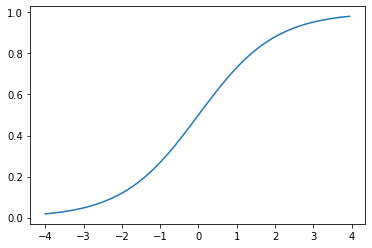

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.arange(-4, 4, 0.05)
y = 1 / (1+ np.exp(-x))
ax.plot(x, y)

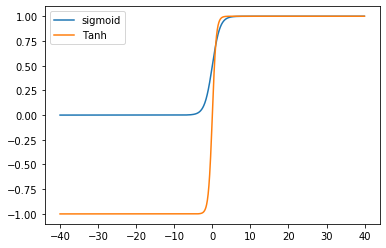

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.arange(-40, 40, 0.05)
y = 1 / (1+ np.exp(-x))
y2 = 2 * 1.0 / (1 + np.exp(-2*x)) - 1  # Tanh 函数 0均值
ax.plot(x, y, label='sigmoid')  # 横坐标足够大时, Sigmoid看起来很像一个阶跃函数
ax.plot(x, y2, label='Tanh')
plt.legend(loc='best')

Logistic Regression虽然名字里带“回归”，但是它实际上是一种分类方法，用于两分类问题（即输出只有两种）.需要先找到一个预测函数（h），显然，该函数的输出必须是两个值（分别代表两个类别），所以利用了Logistic函数（或称为Sigmoid函数）,接下来需要确定数据划分的边界类型。  

对于线性边界，边界形式如下: $$\theta_0 + \theta_1x_1 + \cdots + \theta_nx_n = \sum_{i=0}^{n}\theta_nx_n=\theta^Tx \tag{2}$$   
$\theta$就是所求的系数  

构造预测函数(Sigmoid)为: $$h_\theta(x)=g(\theta^Tx)= \frac {1}{1+e^{-\theta^Tx}} \tag {3}$$  
$h_\theta(x)$函数的意义就是结果取1的概率,因此对于输入x分类结果为类别1和类别0的概率分别为
$$
\begin{align} 
P(y=1|x;\theta) &= h_\theta(x) \\
P(y=0|x;\theta) &= 1 - h_\theta(x)
\end{align} \tag{4}
$$

## 3.2 构造Cost函数
Andrew Ng在课程中直接给出了Cost函数及J(θ)函数如式（5）和（6），但是并没有给出具体的解释，只是说明了这个函数来衡量h函数预测的好坏是合理的。
$$ 
Cost(h_{\theta}(x),y)=\begin{cases}
   -log(h_{\theta}(x)) ,\quad if\;y = 1 \\
   -log(1-h_{\theta}(x)) ,\quad if\; y = 0
   \end{cases} \tag{5}
$$
将Cost求平均:
$$
\begin{align}J(\theta) &= \frac {1} {m} \sum_{i=1}^{m}Cost(h_\theta(x^{(i)}), y^{(i)}) \\ 
&= -\frac {1} {m}\left[ \sum_{i=1}^{m}y^{(i)}log(h_\theta(x^{(i)}))+(1-y^{(i)})log(1-h_\theta(x^{(i)}))\right]
\end{align} \tag{6}
$$
实际上这里的Cost函数和J(θ)函数是基于最大似然估计推导得到的。下面详细说明推导的过程。（4）式综合起来可以写成
$$P(y|x;\theta)=(h_\theta(x))^y(1-h_\theta(x))^{1-y} \tag {7}$$
取似然函数为:
$$
\begin{align} L(\theta) &= \prod_{i=1}^{m} P(y^{(i)}|x^{(i)};\theta) \\
&= \prod_{i=1}^{m}(h_\theta(x^{(i)}))^{y^{(i)}}(1-h_\theta(x^{(i)}))^{1-y^{(i)}}
\end{align}\tag{8}
$$
对数似然为:
$$
\begin{align} l(\theta) &= logL(\theta) \\
&= \sum_{i=1}^{m}y^{(i)}log(h_\theta(x^{(i)})) + (1-y^{(i)})log(1-h_\theta(x^{(i)}))
\end{align}\tag{9}
$$
最大似然估计就是要求得使对数似然$l(\theta)$取最大值时的$\theta$，即上文所说**梯度上升求最大似然估计,梯度下降求Cost.** 在Andrew Ng的课程中将$J(\theta)$取为（6）式，即
$$J
(\theta) = -\frac 1 m l(\theta)= -\frac 1 m \sum_{i=1}^{m}[y^{(i)}log(h_\theta(x^{(i)})) + (1-y^{(i)})log(1-h_\theta(x^{(i)}))]\tag {10} 
$$  
应为乘了一个负的系数-1/m,所以$J(\theta)$取最小值时的$\theta$为要求的最佳参数


添加L2范数的正则化表达式:
$$
J(\theta) = \frac 1 m \sum_{i=1}^{m}[-y^{(i)}log(h_\theta(x^{(i)})) - (1-y^{(i)})log(1-h_\theta(x^{(i)}))] + \frac {\lambda}{2m} \sum_{j=1}^n\theta_j^2
$$

## 3.3 梯度下降法求$J(\theta)$的最小值
求$J(\theta)$的最小值可以使用梯度下降法，根据梯度下降法可得$\theta$的更新过程:
$$\theta_j := \theta_j - \alpha\frac {\partial}{\partial\theta_j}J(\theta), \quad (j=0\ldots n) \tag {11}$$
其中 $\alpha$为步长, 求函数J的偏导.  

由**链导法则** $[f(g(x))]' = f'(g(x)) * g'(x)$ 和 **商规则** $(\frac u v)' = \frac {u'v -uv'} {v^2} $得知

$$
f(x) = \frac 1 {1+e^{-g(x)}}
$$  

$$
\begin{align} \frac {\partial}{\partial x}f(x) &= \frac {-1} {(1+e^{-g(x)})^2} \frac {\partial e^{-g(x)}}{\partial x} \\
&= \frac {1} {(1+e^{-g(x)})^2}e^{-g(x)} \frac {\partial}{\partial x}g(x) \\
&= \frac{1}{1+e^{-g(x)}}\frac{e^{-g(x)}}{1+e^{-g(x)}}\frac {\partial}{\partial x}g(x)\\
&= f(x)(1-f(x))\frac {\partial}{\partial x}g(x)
\end{align} \tag {12}
$$
那么对$J$求偏导:
$$
\begin{align}\frac {\partial}{\partial\theta_j}J(\theta) &= 
-\frac {1}{m}\sum_{i=1}^{m}\left(
y^{(i)}\frac {1}{h_\theta(x^{(i)})}\frac {\partial}{\partial\theta_j}h_\theta(x^{(i)})
-(1-y^{(i)})\frac {1}{1-h_\theta(x^{(i)})}\frac {\partial}{\partial\theta_j}h_\theta(x^{(i)})
\right) \\
&= -\frac {1}{m}\sum_{i=1}^{m}\left(
y^{(i)}\frac {1}{g(\theta^Tx^{(i)})}-(1-y^{(i)})\frac {1}{1-g(\theta^Tx^{(i)})}
\right)\frac {\partial}{\partial\theta_j}g(\theta^Tx^{(i)}) \\
&= -\frac {1}{m}\sum_{i=1}^{m}\left(
y^{(i)}\frac {1}{g(\theta^Tx^{(i)})}-(1-y^{(i)})\frac {1}{1-g(\theta^Tx^{(i)})}
\right)g(\theta^Tx^{(i)})(1-g(\theta^Tx^{(i)}))\frac {\partial}{\partial\theta_j}\theta^Tx^{(i)}\\
&=  -\frac {1}{m}\sum_{i=1}^{m} \left( 
y^{(i)}(1-g(\theta^Tx^{(i)}))-(1-y^{(i)})g(\theta^Tx^{(i)})
\right)x_j^{(i)} \\
&= -\frac {1}{m}\sum_{i=1}^{m} \left(
y^{(i)}-g(\theta^Tx^{(i)}))
\right))x_j^{(i)} \\
&= -\frac {1}{m}\sum_{i=1}^{m} \left(
y^{(i)}-h_\theta(x^{(i)})
\right))x_j^{(i)} \\
&= \frac {1}{m}\sum_{i=1}^{m} \left(
h_\theta(x^{(i)}) - y^{(i)}
\right))x_j^{(i)} \\
\end{align} \tag {13}
$$

因此, (11)式的更新过程可以写成: 
$$
\theta_j := \theta_j - \alpha \frac {1}{m}\sum_{i=1}^{m} \left(
h_\theta(x^{(i)}) - y^{(i)}
\right)x_j^{(i)}, \quad j=(0\ldots n) \tag{14}
$$
因为式中α本来为一常量，所以1/m一般将省略，所以最终的θ更新过程为:
$$
\theta_j := \theta_j - \alpha\sum_{i=1}^{m} \left(
h_\theta(x^{(i)}) - y^{(i)}
\right)x_j^{(i)}, \quad j=(0\ldots n) \tag{15}
$$

带L2惩罚项的梯度下降法:

$$
\theta_0 := \theta_0 - \alpha\sum_{i=1}^{m} \left(
h_\theta(x^{(i)}) - y^{(i)}
\right)x_0^{(i)}\\
\theta_j := \theta_j - \alpha[\sum_{i=1}^{m} \left(
h_\theta(x^{(i)}) - y^{(i)}
\right)x_j^{(i)} + \lambda \theta_j], \quad j=(1,2, 3\ldots n) 
$$
若使用梯度上升法求似然$l(\theta)$取到最大值时的$\theta$也是一样的:
$$
\begin{align} \theta_j &:= \theta_j + \alpha \frac {\partial}{\partial \theta_j}l(\theta) \\
&=\theta_j + \alpha\sum_{i=1}^{m} \left(
y^{(i)}-h_\theta(x^{(i)})
\right)x_j^{(i)}, \end{align} \quad j=(0\ldots n)\tag{16}
$$

## 3.4 梯度下降过程向量化
约定训练数据的矩阵形式如下，**x**(m行n列)的每一行为一条训练样本，而每一列为不同的特征取值,y为样本的分类
$$
x = \begin{bmatrix} x^{(1)} \\  x^{(2)} \\ \vdots \\ x^{(m)} \end{bmatrix} =
\begin{bmatrix} x_0^{(1)} & x_1^{(1)}  & \cdots  & x_n^{(1)} \\
x_0^{(2)} & x_1^{(2)}  & \cdots  & x_n^{(2)} \\ 
\vdots & \vdots& \ddots& \vdots \\
x_0^{(m)} & x_1^{(m)}  & \cdots  & x_n^{(m)} \\
\end{bmatrix}, y = \begin{bmatrix}y^{(1)} \\  y^{(2)} \\ \vdots \\ y^{(m)} \end{bmatrix} \tag{17}
$$
约定待求的参数$\theta$的矩阵形式为：
$$
\theta = \begin{bmatrix} \theta_0 \\ \theta_1 \\ \vdots \\ \theta_n \end{bmatrix} \tag{18}
$$
求$x \cdot \theta$并记为**A**:
$$
A=x\cdot\theta =\begin{bmatrix} x_0^{(1)} & x_1^{(1)}  & \cdots  & x_n^{(1)} \\
x_0^{(2)} & x_1^{(2)}  & \cdots  & x_n^{(2)} \\ 
\vdots & \vdots& \ddots& \vdots \\
x_0^{(m)} & x_1^{(m)}  & \cdots  & x_n^{(m)} \\
\end{bmatrix} \cdot \begin{bmatrix} \theta_0 \\ \theta_1 \\ \vdots \\ \theta_n \end{bmatrix}
= \begin{bmatrix} \theta_0x_0^{(1)} + \theta_1x_1^{(1)} +\cdots  + \theta_nx_n^{(1)} \\
\theta_0x_0^{(2)} +\theta_1 x_1^{(2)}  + \cdots  + \theta_nx_n^{(2)} \\ 
\vdots \\
\theta_0x_0^{(m)} + \theta_1x_1^{(m)} + \cdots + \theta_nx_n^{(m)} \\
\end{bmatrix} \tag{19}
$$
接着求$h_\theta(x)-y$并记为 E

$$
E = h_\theta(x)-y = \begin{bmatrix}
g(A^{(1)})-y^{(1)} \\g(A^{(2)})-y^{(2)} \\ \vdots\\ g(A^{(m)})-y^{(m)}\end{bmatrix}
= \begin{bmatrix} error^{(1)} \\error^{(2)} \\ \vdots \\error^{(m)} \end{bmatrix}
= g(A)-y \tag{20}
$$
g(A)的参数A为一列向量，所以实现g函数时要支持列向量作为参数，并返回列向量。由上式可知$h_\theta(x)-y$可以由g(A)-y一次计算求得.
再来看(15)式在$\theta$更新的过程中,当**j=0**时:
$$
\begin{align}
\theta_0 &:= \theta_0 - \alpha \sum_{i=1}^{m}\left(h_\theta(x^{(i)})-y^{(i)} \right)x_0^{(i)}\\
&= \theta_0 - \alpha \sum_{i=1}^{m}error^{(i)}x_0^{(i)} \\
&= \theta_0-\alpha\cdot (x_0^{(1)},x_0^{(2)}, \cdots,(x_0^{(m)} )\cdot E
\end{align} \tag{21}
$$
同理有$$\theta_j := \theta_0-\alpha\cdot (x_j^{(1)},x_j^{(2)}, \cdots,x_j^{(m)} )\cdot E  \tag{22}$$ 
合并起来就是:
$$
\begin{bmatrix} \theta_0 \\ \theta_1 \\ \vdots \\ \theta_n \end{bmatrix}
:= \begin{bmatrix} \theta_0 \\ \theta_1 \\ \vdots \\ \theta_n \end{bmatrix}  - \alpha \cdot 
\begin{bmatrix} x_0^{(1)}& x_0^{(2)}& \cdots,x_0^{(m)} \\
x_1^{(1)}& x_1^{(2)}& \cdots,x_1^{(m)} \\
\vdots\\
x_n^{(1)}& x_n^{(2)}& \cdots,x_n^{(m)} \\
\end{bmatrix}\cdot E = \theta - \alpha\cdot x^T \cdot E \tag{23}
$$
综上所述，vectorization后θ更新的步骤如下：

（1）求$A=x\cdot \theta$；

（2）求E=g(A)-y；

（3）求$\theta:=\theta-\alpha \cdot x^T\cdot E$



## Logistic 回归 开发流程
```
每个回归系数初始化为 1
重复 R 次:
    计算整个数据集的梯度
    使用 步长 x 梯度 更新回归系数的向量
返回回归系数
```
```
收集数据: 采用任意方法收集数据
准备数据: 由于需要进行距离计算，因此要求数据类型为数值型。另外，结构化数据格式则最佳。
分析数据: 采用任意方法对数据进行分析。
训练算法: 大部分时间将用于训练，训练的目的是为了找到最佳的分类回归系数。
测试算法: 一旦训练步骤完成，分类将会很快。
使用算法: 首先，我们需要输入一些数据，并将其转换成对应的结构化数值；接着，基于训练好的回归系数就可以对这些数值进行简单的回归计算，判定它们属于哪个类别；在这之后，我们就可以在输出的类别上做一些其他分析工作
```

## 项目案例1: 使用 Logistic 回归在简单数据集上的分类
### 项目概述
在一个简单的数据集上，采用梯度上升法找到 Logistic 回归分类器在此数据集上的最佳回归系数

### 开发流程
    收集数据: 可以使用任何方法
    准备数据: 由于需要进行距离计算，因此要求数据类型为数值型。另外，结构化数据格式则最佳
    分析数据: 画出决策边界
    训练算法: 使用梯度上升找到最佳参数
    测试算法: 使用 Logistic 回归进行分类
    使用算法: 对简单数据集中数据进行分类

### 收集数据
存储格式:  
```
-0.017612	14.053064	0
-1.395634	4.662541	1
-0.752157	6.538620	0
-1.322371	7.152853	0
0.423363	11.054677	0
0.406704	7.067335	1
```

### 准备数据

In [8]:
# 获取解析数据
def load_data_set(file_name):
    array1, array2, array3 = np.loadtxt(file_name, delimiter='\t', unpack=True)
    # print(array1.shape)
    # 为了方便计算，我们将 X0 的值设为 1.0 ，也就是在每一行的开头添加一个 1.0 作为 X0
    data_mat = np.stack((np.ones(array1.shape), array1, array2), axis=1)  # [[1, -0.017612, 14.053064], [...]]
    return data_mat, array3

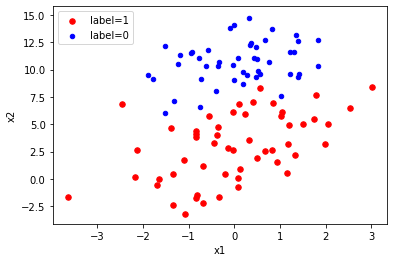

In [9]:
# TestSet中分布
fig = plt.figure()
ax = fig.add_subplot(111)
data_mat, label = load_data_set('TestSet.txt')
ax.scatter(data_mat[np.where(label==1), 1], data_mat[np.where(label==1), 2], s=30, c='red', label='label=1')
ax.scatter(data_mat[np.where(label==0), 1], data_mat[np.where(label==0), 2], s=20, c='b', label='label=0')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
plt.legend(loc="best")

### 分析数据: 采用任意方法对数据进行分析，此处不需要

### 训练算法: 使用批量梯度下降(Batch Gradient Descent, BGD)找到最佳参数
批量梯度下降法是最原始的形式，它是指在每一次迭代时使用`所有样本`来进行梯度的更新
优点：  
- 一次迭代是对所有样本进行计算，此时利用矩阵进行操作，实现了并行。
- 由全数据集确定的方向能够更好地代表样本总体，从而更准确地朝向极值所在的方向。当目标函数为凸函数时，BGD一定能够得到全局最优。

缺点：
- 当样本数目 m 很大时，每迭代一步都需要对所有样本计算，训练过程会很慢。

从迭代的次数上来看，BGD迭代的次数相对较少.

In [10]:
def sigmoid(inx):
    # sigmod阶跃函数  
    '''inx为单个值时可以用
    if inx >= 0:  # 防止 inx为负数时出现极大数字
        return 1 / (1 + np.exp(-inx))
    else:
        return np.exp(inx) / (1 + np.exp(inx))
    '''
    return 1 / (1 + np.exp(-inx))
    # Tanh是Sigmoid的变形，与 sigmoid 不同的是，tanh 是0均值的。因此，实际应用中，tanh 会比 sigmoid 更好。
    # return 2 * 1.0 / (1 + np.exp(-2*inx)) - 1

In [11]:
def grad_descent(data_mat, class_labels):
    """
    data_mat: 二位矩阵,每行代表一个训练样本, 每列代表不同特征
    class_labels: 代表样本分类的矩阵
    """
    alpha, max_cyles = 0.001, 500  # 步长, 迭代次数
    data_mat = np.mat(data_mat)  # 使用matrix 直接使用 '*'相乘, ndarray需要np.dot 
    sample_num, feature_num = data_mat.shape
    label_mat = np.mat(class_labels).T # n * 1
    weights = np.ones((feature_num, 1))  # 特征的回归系数, 初始化为1  3*1 matrix
    weights_all = weights.copy()
    for _ in range(max_cyles):
        # h_theta(x) = g(A)  A = x*theta
        h = sigmoid(data_mat*weights)  # n*3 * 3*1  -> n*1
        # 实际类别值 - 预测值 E = y - h_theta(x)
        error = (h - label_mat)
        # 0.001 * (3, n) * (n, 1) -> (3, 1) 每个特征(列)一个误差 得到x1,x2,xn的系数的偏移量
        # 梯度上升迭代公式: w = w + x^T * E
        weights -= alpha * data_mat.T * error
        weights_all = np.concatenate((weights_all, weights), axis=1)
    return weights_all

In [12]:
data_mat, label = load_data_set('TestSet.txt')
w_all = grad_descent(data_mat, label)
w_all[:, -1], w_all

(array([ 4.1241,  0.4801, -0.6168]),
 array([[ 1.    ,  0.9636,  0.9284, ...,  4.1173,  4.1207,  4.1241],
        [ 1.    ,  0.9829,  0.9648, ...,  0.4795,  0.4798,  0.4801],
        [ 1.    ,  0.4883, -0.0126, ..., -0.616 , -0.6164, -0.6168]]))

#### 迭代次数和参数收敛情况

In [13]:
def plt_weights(weights, x):
    f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)
    w0 = weights[0]
    w1 = weights[1]
    w2 = weights[2]
    ax1.plot(x, w0, c='r')
    ax1.set_ylabel('w0')
    ax2.plot(x, w1, c='g')
    ax2.set_ylabel('w1')
    ax3.plot(x, w2, label='w2', c='b')
    ax3.set_ylabel('w2')
    plt.xlabel('iteration')

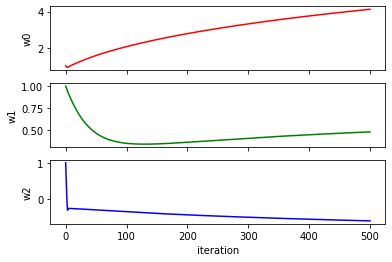

In [14]:
plt_weights(w_all, np.arange(501))

#### 画出拟合曲线

In [15]:
def plot_best_fit(data_mat, label, weights):
    # 画出数据和拟合曲线
    fig = plt.figure()
    ax = fig.add_subplot(111)
    # data_mat, label = load_data_set('TestSet.txt')
    ax.scatter(data_mat[np.where(label==1), 1], data_mat[np.where(label==1), 2], s=30, c='red', label='label=1')
    ax.scatter(data_mat[np.where(label==0), 1], data_mat[np.where(label==0), 2], s=20, c='b', label='label=0')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    # 回归线 \theta^Tx = w0+w1x1+w2x2=0 -> 令Sigmoid函数输入值为0 这是2个分类的分界点
    x = np.linspace(-4, 4, 80)  # 设x1为x轴
    y = -(weights[0] + weights[1]*x) / weights[2]  # x2为y轴
    ax.plot(x, y, label='Regression')
    plt.legend(loc="best")
    

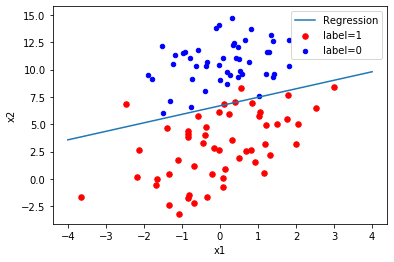

In [16]:
def test_lr():
    data_mat, label = load_data_set('TestSet.txt')
    weights = grad_descent(data_mat, label)
    plot_best_fit(data_mat, label, weights[:, -1])
test_lr()

### 训练算法: 优化 随机梯度下降(Stochastic Gradient Descent, SGD)

梯度上升算法在每次更新回归系数时都需要遍历整个数据集($data\_mat.T \cdot error$)，该方法在处理 100 个左右的数据集时尚可，但如果有数十亿样本和成千上万的特征，那么该方法的计算复杂度就太高了。一种改进方法是`一次迭代`仅用`一个样本点`来更新回归系数，该方法称为 `随机梯度上升算法`。由于可以在新样本到来时对分类器进行增量式更新，因而随机梯度上升算法是一个在线学习(online learning)算法。与 “在线学习” 相对应，一次处理所有数据被称作是 “批处理” （batch） 。
随机梯度上升算法可以写成如下的伪代码: 

```
所有回归系数初始化为 1
对数据集中每个样本
    计算该样本的梯度
    使用 alpha x gradient 更新回归系数值
返回回归系数值
```

对于一个样本的目标函数为:
$$J^{i}(\theta)=y^{(i)}log\big(h_\theta(x^{i})\big)+(1-y^{(i)})log\big(1-h_\theta(x^{(i)})\big) \tag{24}$$ 
对目标函数求偏导:
$$\frac {\partial}{\partial \theta}J^{i}(\theta_j) = \big(h_\theta(x^{(i)}) - y^{(i)}\big)x_j^{(i)} \tag{25}$$
参数更新:
$$\theta_j := \theta_j - \alpha\big(h_\theta(x^{(i)}) - y^{(i)}\big)x_j^{(i)} \tag{26}$$
**优点**：
- 由于不是在全部训练数据上的损失函数，而是在每轮迭代中，随机优化某一条训练数据上的损失函数，这样每一轮参数的更新速度大大`加快`。  

**缺点**：
- 准确度下降。由于即使在目标函数为强凸函数的情况下，SGD仍旧`无法做到线性收敛`。
- 可能会收敛到`局部最优`，由于单个样本并不能代表全体样本的趋势。
- 不易于并行实现。

In [17]:
def sto_grad_descent_0(data_mat, class_labels):
    """
    data_mat: 二位矩阵,每行代表一个训练样本, 每列代表不同特征
    class_labels: 代表样本分类的矩阵
    """
    m, n = data_mat.shape
    weights = np.ones(n)
    w_all = weights.copy()
    alpha = 0.01
    for j in range(m):
        # 每次迭代只计算一个样本的Cost的梯度
        # h_\theta(x^{(i)}
        h = sigmoid((data_mat[j]*weights).sum())  # 一个样本的预测值
        error = h - class_labels[j]
        weights -= alpha * error * data_mat[j]
        w_all = np.vstack((w_all, weights))
    return w_all.T

#### 参数收敛情况
对整个数据集进行一次完整计算的结果并不理想,修改sto_grad_ascent代码, 使其在整个数据集上运行200次

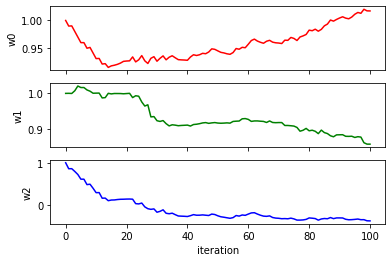

In [18]:
data_mat, label = load_data_set('TestSet.txt')
weights = sto_grad_descent_0(data_mat, label)
weights
plt_weights(weights, np.arange(101))

#### 改进,在整个数据集上迭代多次

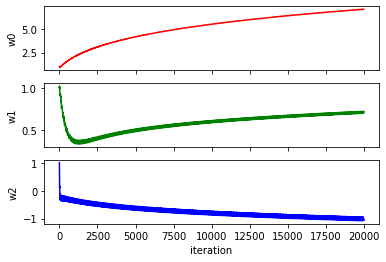

In [19]:
def sto_grad_descent_1(data_mat, class_labels):
    """
    data_mat: 二维矩阵,每行代表一个训练样本, 每列代表不同特征
    class_labels: 代表样本分类的矩阵
    """
    m, n = data_mat.shape
    weights = np.ones(n)
    w_all = weights.copy()
    alpha = 0.01
    for _ in range(200):  # 在整个数据集上运行200次
        for j in range(m):
            # 每次迭代只计算一个样本的Cost的梯度
            # h_\theta(x^{(i)}
            h = sigmoid(np.sum(data_mat[j]*weights))  # 一个样本的预测值
            error =  h - class_labels[j]
            weights -= alpha * error * data_mat[j]
            w_all = np.vstack((w_all, weights))
    return w_all.T
data_mat, label = load_data_set('TestSet.txt')
weights = sto_grad_descent_1(data_mat, label)
plt_weights(weights, np.arange(100*200+1))

参数出现周期性波动,原因是存在一些不能正确分类的样本点(数据集并非线性可分),在每次迭代时会引发系数的剧烈改变

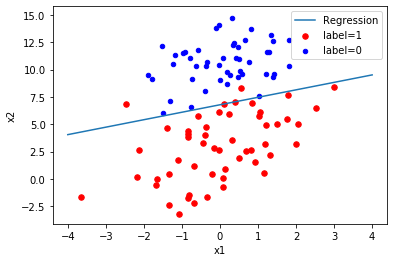

In [20]:
def test_lr_sto_1():
    # 随机梯度下降 SGD 
    data_mat, label = load_data_set('TestSet.txt')
    weights = sto_grad_descent_1(data_mat, label)
    plot_best_fit(data_mat, label, weights[:, -1])
test_lr_sto_1()

#### 再次改进
第一处改进为 alpha 的值。alpha 在每次迭代的时候都会调整，这回缓解上面波动图的数据波动或者高频波动。另外，虽然 alpha 会随着迭代次数不断减少，但永远不会减小到 0，因为我们在计算公式中添加了一个常数项。

第二处修改为 randIndex 更新，这里通过随机选取样本拉来更新回归系数。这种方法将减少周期性的波动。这种方法每次随机从列表中选出一个值，然后从列表中删掉该值（再进行下一次迭代）

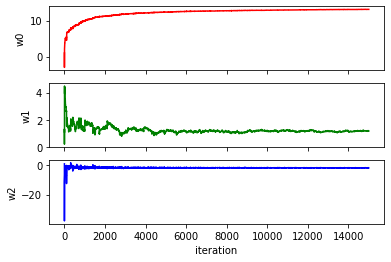

In [21]:
def sto_grad_descent_2(data_mat, class_labels, iter_num=150):
    m, n = data_mat.shape
    weights = np.ones(n)
    w_all = weights.copy()
    
    for j in range(iter_num):  # 在整个数据集上运行x次
        data_index = list(range(m))  # 0, 1, ...m-1 整个训练样本序号集合
        for i in range(m):
            # i和j的不断增大，导致alpha的值不断减少，但是不为0
            # 每次减少1/(i+j) 当j<<max(i)时, alpha就不是严格下降的
            alpha = 4/(1+j+i) + 0.001
            # 随机从训练样本中抽取数据 进行Cost梯度下降,之后将这个数据从样本集中删除
            rand_index = int(np.random.uniform(0, len(data_index)))
            h = sigmoid(np.sum(data_mat[data_index[rand_index]]*weights))  # 一个样本的预测值
            error =  h - class_labels[data_index[rand_index]]
            weights -= alpha * error * data_mat[data_index[rand_index]]
            w_all = np.vstack((w_all, weights))
            # w_all = np.concatenate((w_all, weights), axis=1)
            del(data_index[rand_index])
    return  w_all.T
data_mat, label = load_data_set('TestSet.txt')
weights = sto_grad_descent_2(data_mat, label)
plt_weights(weights, np.arange(100*150+1))

通过随机选取样本来更新回归系数,减少周期性波动.

In [22]:
weights[:,-1] 

array([13.0938,  1.1778, -1.8261])

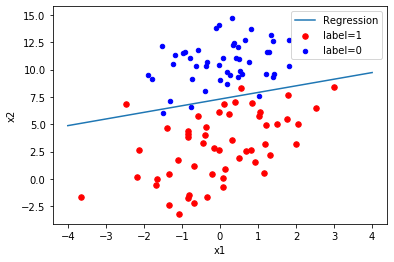

In [23]:
def test_lr_sto_2():
    # 随机梯度下降 SGD 
    data_mat, label = load_data_set('TestSet.txt')
    weights = sto_grad_descent_2(data_mat, label)
    plot_best_fit(data_mat, label, weights[:, -1])
test_lr_sto_2()

### 训练算法: 优化 小批量梯度下降（Mini-Batch Gradient Descent, MBGD）
小批量梯度下降，是对批量梯度下降以及随机梯度下降的一个折中办法。其思想是：每次迭代 使用 **batch_size** 个样本来对参数进行更新。
这里我们假设 batchsize=10，样本数m=100, 每次$\theta$更新时:  
$$\theta_j := \theta_j - \alpha \frac {1}{m}\sum_{k=i}^{i+9} \left(
h_\theta(x^{(k)}) - y^{(k)}
\right)x_j^{(k)}, \quad j=(0\ldots n) \tag {27}$$
伪代码: 
```
repeat{
    for i=1,11,21,31,...,91{
       theta 更新
    }
  }
```
优点：
- 通过矩阵运算，每次在一个batch上优化神经网络参数并不会比单个数据慢太多。
- 每次使用一个batch可以大大减小收敛所需要的迭代次数，同时可以使收敛到的结果更加接近梯度下降的效果。(比如训练样本大小为的30W，设置batch_size=100时，需要迭代3000次，远小于SGD的30W次)
- 可实现并行化。  
  
缺点：
- batch_size的不当选择可能会带来一些问题。


batcha_size的选择带来的影响：
- 在合理地范围内，增大batch_size的好处:

    * 内存利用率提高了，大矩阵乘法的并行化效率提高.
    * 跑完一次 epoch（全数据集）所需的迭代次数减少，对于相同数据量的处理速度进一步加快。
    * 在一定范围内，一般来说 Batch_Size 越大，其确定的下降方向越准，引起训练震荡越小。
- 盲目增大batch_size的坏处：
    * 内存利用率提高了，但是内存容量可能撑不住了。
    * 跑完一次 epoch（全数据集）所需的迭代次数减少，要想达到相同的精度，其所花费的时间大大增加了，从而对参数的修正也就显得更加缓慢。
    * Batch_Size 增大到一定程度，其确定的下降方向已经基本不再变化。
   

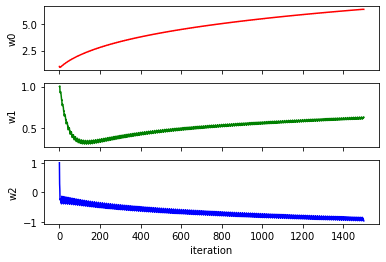

In [24]:
def mb_grad_descent(data_mat, class_labels, iter_num=150):
    """小批量梯度下降
    data_mat: 二位矩阵,每行代表一个训练样本, 每列代表不同特征
    class_labels: 代表样本分类的矩阵
    """
    alpha = 0.01  # 步长,
    data_mat = np.mat(data_mat)  # 使用matrix 直接使用 '*'相乘, ndarray需要np.dot 
    sample_num, feature_num = data_mat.shape
    label_mat = np.mat(class_labels).T # n * 1
    weights = np.ones((feature_num, 1))  # 特征的回归系数, 初始化为1  3*1 matrix
    weights_all = weights.copy()
    for _ in range(iter_num): 
        for j in range(0, sample_num, 10):
            # h_theta(x) = g(A)  A = x*theta
            h = sigmoid(data_mat[j:j+10]*weights)  # 10*3 * 3*1  -> 10*1
            # 实际类别值 - 预测值 E = y - h_theta(x)
            error = (h - label_mat[j:j+10])
            # 0.001 * (3, 10) * (10, 1) -> (3, 1) 每个特征(列)一个误差 得到x1,x2,xn的系数的偏移量
            # 梯度上升迭代公式: w = w + x^T * E
            weights -= alpha * data_mat[j:j+10].T * error
            weights_all = np.concatenate((weights_all, weights), axis=1)
    return weights_all
weights = mb_grad_descent(data_mat, label, 150)
plt_weights(weights, np.arange(10*150+1))

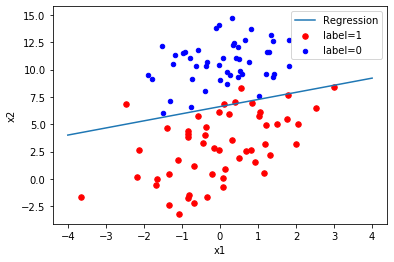

In [25]:
def test_lr_mbgd():
    # 小批量梯度下降 MBGD 
    data_mat, label = load_data_set('TestSet.txt')
    weights = mb_grad_descent(data_mat, label)
    plot_best_fit(data_mat, label, weights[:, -1])
test_lr_mbgd()